In [1]:
import json
import datetime
import dateutil
import pytz
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import csv
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
from datetime import datetime
from datetime import timedelta
import dateutil.parser
from gensim import corpora, models
from pprint import pprint
import re

nltk.download('wordnet')

stemmer = PorterStemmer()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >= 3:
            result.append(lemmatize_stemming(token))
    return result
            
youtuber_list_path="subscriber_network.json"

comments=[]
with open(youtuber_list_path,'r') as fp:
    youtubers=json.loads(fp.read())["nodes"]
    for you in youtubers:
        for vi in you["video_list"]:
            comments+=[c["text"] for c in vi["comment_list"]]
processed_docs=list(map(preprocess,comments))      

dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=10, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shoen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Topic: 0 Word: 0.091*"teamtre" + 0.073*"youtub" + 0.073*"http" + 0.069*"href" + 0.069*"com" + 0.068*"www" + 0.054*"tree" + 0.053*"result" + 0.053*"search_queri" + 0.039*"team"
Topic: 1 Word: 0.031*"quot" + 0.018*"lol" + 0.012*"ye" + 0.009*"like" + 0.009*"que" + 0.008*"video" + 0.008*"tree" + 0.007*"get" + 0.007*"omg" + 0.007*"music"
Topic: 2 Word: 0.027*"video" + 0.023*"beast" + 0.015*"best" + 0.014*"cool" + 0.014*"wow" + 0.013*"great" + 0.012*"love" + 0.012*"tree" + 0.012*"thank" + 0.011*"vid"
Topic: 3 Word: 0.027*"tree" + 0.019*"donat" + 0.019*"million" + 0.018*"save" + 0.017*"plant" + 0.015*"love" + 0.014*"comment" + 0.014*"money" + 0.013*"dollar" + 0.012*"mrbeast"
Topic: 4 Word: 0.023*"tree" + 0.023*"plant" + 0.016*"nice" + 0.015*"good" + 0.010*"awesom" + 0.009*"amaz" + 0.008*"video" + 0.008*"like" + 0.007*"groot" + 0.007*"great

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:972: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1186: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:420: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'c:'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'. . .'" looks like a filename, not markup. You should probably open thi

[['your', 'face', 'will', 'turn', 'red', 'never', 'seen', 'my', 'face', 'turn', 'red', 'but', 'lemme', 'try', 'it', 'll', 'be', 'back', 'when', 'it', 'worked'], ['doctor', 'mike', 'no', 'electronics', 'before', 'bedtime', 'me', 'watches', 'all', 'of', 'his', 'latest', 'videos', 'at', 'pm'], ['здравствуи', 'dr', 'mike'], ['its', 'actually', 'so', 'no', 'need', 'to', 'bother'], ['no', 'one', 'your', 'friends', 'in', 'jamaica', 'eh', 'eh', 'eh'], ['what', 'is', 'your', 'introooo'], ['omg', 'what', 'floppy', 'tongue', 'you', 've', 'got'], ['watching', 'this', 'in', 'bed', 'at', 'clock', 'and', 'can', 'even', 'be', 'bothered', 'putting', 'on', 'night', 'mode'], ['he', 'has', 'tumor', 'dr', 'mike', 'pouty', 'face'], ['me', 'only', 'think', 'of', 'sad', 'stuff', 'cause', 'used', 'to', 'get', 'bullied', 'him', 'you', 'stay', 'up', 'at', 'night', 'cause', 'when', 'you', 'see', 'your', 'friends', 'oh', 'put', 'app', 'name', 'here', 'having', 'funme', 'don', 'even', 'have', 'many', 'friends', 'or

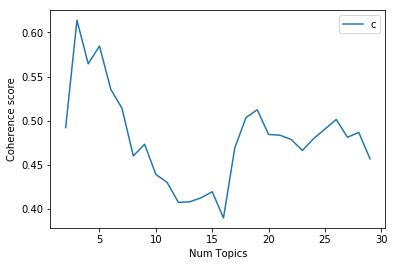

Num Topics = 2  has Coherence Value of 0.492
Num Topics = 3  has Coherence Value of 0.6139
Num Topics = 4  has Coherence Value of 0.5645
Num Topics = 5  has Coherence Value of 0.5846
Num Topics = 6  has Coherence Value of 0.5355
Num Topics = 7  has Coherence Value of 0.5137
Num Topics = 8  has Coherence Value of 0.4598
Num Topics = 9  has Coherence Value of 0.473
Num Topics = 10  has Coherence Value of 0.4388
Num Topics = 11  has Coherence Value of 0.4297
Num Topics = 12  has Coherence Value of 0.407
Num Topics = 13  has Coherence Value of 0.4077
Num Topics = 14  has Coherence Value of 0.4122
Num Topics = 15  has Coherence Value of 0.4191
Num Topics = 16  has Coherence Value of 0.3894
Num Topics = 17  has Coherence Value of 0.4687
Num Topics = 18  has Coherence Value of 0.5035
Num Topics = 19  has Coherence Value of 0.5122
Num Topics = 20  has Coherence Value of 0.4842
Num Topics = 21  has Coherence Value of 0.4834
Num Topics = 22  has Coherence Value of 0.4785
Num Topics = 23  has Coh

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from nltk.corpus import stopwords
import os
import json
from bs4 import BeautifulSoup

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Define functions for stopwords, bigrams, trigrams and lemmatization
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print("process topic{}".format(num_topics))
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

youtuber_list_path="subscriber_network.json"

comments=[]
with open(youtuber_list_path,'r') as fp:
    youtubers=json.loads(fp.read())["nodes"]
    for you in youtubers:
        for vi in you["video_list"]:
            for comment in vi["comment_list"]:
                cleantext = BeautifulSoup(comment["text"],"html.parser").text
                comments.append(cleantext)
comment_words = list(sent_to_words(comments))
data_words = list(sent_to_words(comment_words))
print(data_words[0:10])

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100) 

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print("lemmatized")

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]])

# # Show Topics
# pprint(ldamallet.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=30, step=1)

# Show graph
limit=30; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)

# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

# # Compute Perplexity
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

# # Visualize the topics
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# vis